<a href="https://colab.research.google.com/github/ninadcpa/DSC540/blob/main/Week_9_10_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSC540 Week 7 and 8 Exercise
@author Ninad Patkhedkar

In [1]:
from google.colab import drive
import sys
import os

drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/Colab Notebooks/DSC540')
os.chdir('/content/drive/MyDrive/Colab Notebooks/DSC540')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1 
**Data Wrangling with Python: Activity 9, page 294**

In [2]:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import re

In [3]:
gutenberg_url = 'https://www.gutenberg.org/browse/scores/top'

# For SSL ceritficates verification will specify parameter verify=True
resp = requests.get(gutenberg_url,verify=True)

In [4]:
# Following Linux standard, I will return 0 in case of successful request
# And will return any non-zero number in case of failure (in this case non-zero number I chose is 255)
def status_check(r):
    if r.status_code==200:
        print("Success!")
        return 0
    else:
        print("Failed!")
        return 255

In [5]:
status_check(resp)

Success!


0

In [6]:
soup = BeautifulSoup(resp.text)


In [7]:
# Empty list to hold all the http links in the HTML page
lst_links=[]

# Find all the anchor tags <a> and then link inside it
for link in soup.find_all('a'):
    #print(link.get('href'))
    lst_links.append(link.get('href'))

lst_links[:50]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7',
 '#authors-last7',
 '#books-last30',
 '#authors-last30',
 '/ebooks/1342',
 '/ebooks/84',
 '/ebooks/11',
 '/ebooks/1661',
 '/ebooks/98',
 '/ebooks/65401',
 '/ebooks/5740',
 '/ebooks/2701',
 '/ebooks/64317',
 '/ebooks/11483',
 '/ebooks/174',
 '/ebooks/345',
 '/ebooks/5200',
 '/ebooks/57775',
 '/ebooks/2591',
 '/ebooks/205',
 '/ebooks/1260']

List shows that there are multiple hyperlinks on page. But actuall hyperlinks for books start only from entry /ebook/1342. All previous links are just for navigation on the site.

So lets find the index of /ebook/1342

In [8]:
# Find index of item /ebooks/84
index_of_first_book_link = lst_links.index('/ebooks/1342')
index_of_first_book_link

33

As we need list of 100 most popular books will run the loop for 100 records starting from index 33 to 133

In [23]:
booknum=[]
for i in range(33,133):
    link=lst_links[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        booknum.append(n[0])

In [24]:
print ("\nThe file numbers for the top 10 ebooks on Gutenberg are shown below\n")
nl = '\n'
text = f"Winners are:{nl}{nl.join(booknum[:10])}"
print(text)



The file numbers for the top 10 ebooks on Gutenberg are shown below

Winners are:
1342
84
11
1661
98
65401
5740
2701
64317
11483


In [36]:
print(f"{ soup.text[:1100] } ")




Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2021-05-22130183
last 7 days1073784
last 30 days4821681



Top 100 EBooks yesterda

Looking at web page first book in the list appears to be "Pride and Prejudice by Jane Austen (1180)"
Using splitlines to extract each book entry from text to a list

In [45]:
# Temp empty list of Ebook names
lst_titles_temp=[]
start_idx=soup.text.splitlines().index('Pride and Prejudice by Jane Austen (1180)')

Capturing 100 books entries in a list.

In [47]:
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+i])

Using regex to filter Titles only stripping (number) part

In [50]:
lst_titles=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])

In [51]:
for l in lst_titles:
    print(l)

Pride and Prejudice by Jane Austen 
Frankenstein
Alice
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
A Tale of Two Cities by Charles Dickens 
A Perfect Fool
Tractatus Logico
Moby Dick
The Great Gatsby by F
The Life and Letters of Lewis Carroll 
The Picture of Dorian Gray by Oscar Wilde 
Dracula by Bram Stoker 
Metamorphosis by Franz Kafka 
Le jardin des supplices by Octave Mirbeau 
Grimms
Walden
Jane Eyre
The Philippines a Century Hence by Jos
Treasure Island by Robert Louis Stevenson 
Of the Buildings of Justinian by Procopius 
War and Peace by graf Leo Tolstoy 
Et dukkehjem
The Importance of Being Earnest
The Strange Case of Dr
Ulysses by James Joyce 
A Love Crime by Paul Bourget 
The Yellow Wallpaper by Charlotte Perkins Gilman 
The Calumet Book of Oven Triumphs
Plank Frame Barn Construction by John L
The Adventures of Tom Sawyer
Heart of Darkness by Joseph Conrad 
The Hound of the Baskervilles by Arthur Conan Doyle 
The Prophet by Kahlil Gibran 
A Christmas Carol in Pros

## 2 
**Data Wrangling with Python: Activity 10, page 295**

I received key from omdbapi which is simple text. It is not JSON file. I copied it to APIKey.json file in same directory.

In [52]:
import json

with open('APIKey.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

In [53]:
serviceurl = 'http://www.omdbapi.com/?'
apikey = '&apikey='+omdbapi

Function to print json data in formatted form.

In [60]:
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID','Poster']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

Function to ssearch movie from API endpoint

In [61]:
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [66]:
search_movie("Saving Private Ryan")

Retrieving the data of "Saving Private Ryan" now... 
http://www.omdbapi.com/?t=Saving+Private+Ryan&apikey=d7462ee5
--------------------------------------------------
Title: Saving Private Ryan
Year: 1998
Rated: R
Released: 24 Jul 1998
Runtime: 169 min
Genre: Drama, War
Director: Steven Spielberg
Writer: Robert Rodat
Actors: Tom Hanks, Tom Sizemore, Edward Burns, Barry Pepper
Plot: Following the Normandy Landings, a group of U.S. soldiers go behind enemy lines to retrieve a paratrooper whose brothers have been killed in action.
Language: English, French, German, Czech
Country: USA
Awards: Won 5 Oscars. Another 74 wins & 75 nominations.
Ratings: [{'Source': 'Internet Movie Database', 'Value': '8.6/10'}, {'Source': 'Rotten Tomatoes', 'Value': '93%'}, {'Source': 'Metacritic', 'Value': '91/100'}]
Metascore: 91
imdbRating: 8.6
imdbVotes: 1,261,938
imdbID: tt0120815
Poster: https://m.media-amazon.com/images/M/MV5BZjhkMDM4MWItZTVjOC00ZDRhLThmYTAtM2I5NzBmNmNlMzI1XkEyXkFqcGdeQXVyNDYyMDk5MTU@._V1

In [69]:
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=d7462ee5
Error encountered:  Movie not found!


## 3 
**Connect to the Twitter API and do a simple data pull**  
a. If you don’t have a twitter account – create one at twitter.com/signup (you can delete the account after this assignment)  
b. Sign in to apps.twitter.com  
c. Click “Create New App”  
d. Give your app a name and description  
e. Agree to the developer agreement – you will want to make sure to indicate this is for a class project, and this step can take several days to get through, so don’t wait until last minute to complete this portion of the assignment  
f. Create an access token  
g. You should receive a consumer key and a token 
h. Using either the instructions from the book on connecting to an API or for help look here – pull back data searching for “Bellevue University” and “Data Science” (or something else you are interested in)

Generally any REST API can be consumed using requests library. Twitter also exposes REST API. 

However for this exercise, I will use twitter-python library. First I will install the library.

In [23]:
!pip install python-twitter

     |████████████████████████████████| 71kB 5.0MB/s 


After little bit of more research I noticed that there is another library "tweepy" which has more number of stars on Gihub and which has more number of contributors. So I will prefer to use the tweepy

In [24]:
!pip uninstall python-twitter

Uninstalling python-twitter-3.5:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/python_twitter-3.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/twitter/*
Proceed (y/n)? y
  Successfully uninstalled python-twitter-3.5


In [25]:
!pip install tweepy

Now lests import the library. For security reasons I will copy twitter API keys in a file and use it dynamically, so that keys are not displayed in code or in output. I will copy the keys in same APIKey.json file used in previous example.

In [26]:
with open('APIKey.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']
    api_key = keys['twitter-api-key']
    api_secret_key = keys['twitter-api-secret-key']
    access_token = keys['twitter-access-token']
    access_token_secret = keys['twitter-access-token-secret']


In [27]:
import tweepy

# Authenticate to Twitter
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token,access_token_secret)

api = tweepy.API(auth)

try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


Fetching 10 most recent tweets for Bellevue University

In [28]:
for tweet in api.search(q="Bellevue University", lang="en", rpp=10):
    print(f"{tweet.user.name} --> {tweet.text}\n")

ExpertsSky.com --> Bellevue University is a private university in Bellevue, Nebraska. It opened in 1966 and from the outset has focuse… https://t.co/fgokcD85hE

Shannon Lovin --> @CalebLang22 @KeatonCandor Those students showed no class and were poor representatives of Bellevue University. Way… https://t.co/aqQ0Ox7r1O

PSIVS --> RT @BellevueU: Donut give up on your dreams! 🍩🎓

Congratulations to Hayley and all other soon-to-be Bellevue University graduates! 🎉

#BUGr…

Bellevue University --> Donut give up on your dreams! 🍩🎓

Congratulations to Hayley and all other soon-to-be Bellevue University graduates!… https://t.co/MHglRSxR29

BPWIowa --> Congratulations to Janice Brown, recipient of our first TRAILBLAZ-HER Award! She has been active on BPW local, regi… https://t.co/ltAXD2YR5D

Dr. Monica Swahn --> RT @EbonyGloverPhD: In light of Mental Health Awareness Month, I'm excited to join this panel to discuss Mental Health in the Black Communi…

Jazmine --> He demonstrated nearby Bellevue,

Current hot topic I am following is court case between Apple and EPIC Games (Fortnite) for in-app purchases. Let me find 10 most recent tweets on that.

In [29]:
for tweet in api.search(q="apple vs epic games", lang="en", rpp=10):
    print(f"{tweet.user.name} --> {tweet.text}\n")

Arshisallah --> RT @FortniteFunny: The Apple vs Epic Games lawsuit in a nutshell 🤣

(📸: u/VisitorBR) https://t.co/DY62CoTcHy

NCStories --> Court battle between Epic Games of Cary and Apple expected to wrap up on Monday. 
https://t.co/cGaU2TC0dv

Зять ВВП ⓚⓞⓝⓢⓣⓐⓝⓣⓘⓝ --> RT @WSJ: Epic’s courtroom battle against Apple is expected to end Monday with the judge grilling each side about their cases https://t.co/S…

Johnny Morris --> RT @JMoRichmondVA: @mlbtv Apple TV update = epic fail. Lag time from app launch to recognizing my acct, forced to join live vs starting gam…

Ruth Van Derostyne --> Expert witnesses sparred over whether smartphones have comparable substitutes for playing videogames and the iPhone… https://t.co/rJhTEnK7ir

Capital Journal --> Epic’s courtroom battle against Apple is expected to end Monday with the judge grilling each side about their cases  https://t.co/02BoHkOt3R

Game From Scratch --> @CheOsana Well... Roblox is used to make experiences not games...

(If you're 

## 4 
Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.  
a. Line  
b. Scatter  
c. Bar  
d. Histogram  
e. Density Plot  
f. Pie Chart  

First I will plot scatterplot for sentiment analysis. For this purpose I will use TextBlob library used for NLP from tweet text.

In [52]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Where the tweets are stored to be plotted
polarity_list = []
numbers_list = []
number = 1
# seraching for 100 tweets on topic.
for tweet in tweepy.Cursor(api.search, "apple vs epic games", lang="en").items(100):
  try:
      analysis = TextBlob(tweet.text)
      analysis = analysis.sentiment
      polarity = analysis.polarity
      polarity_list.append(polarity)
      numbers_list.append(number)
      number = number + 1

  except tweepy.TweepError as e:
      print(e.reason)

  except StopIteration:
      break

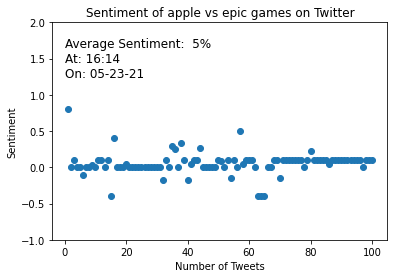

In [53]:
from datetime import datetime
#Plotting
axes = plt.gca()
axes.set_ylim([-1, 2])

plt.scatter(numbers_list, polarity_list)

averagePolarity = (sum(polarity_list))/(len(polarity_list))
averagePolarity = "{0:.0f}%".format(averagePolarity * 100)
time  = datetime.now().strftime("At: %H:%M\nOn: %m-%d-%y")

plt.text(0, 1.25, "Average Sentiment:  " + str(averagePolarity) + "\n" + time, fontsize=12)

plt.title("Sentiment of apple vs epic games on Twitter")
plt.xlabel("Number of Tweets")
plt.ylabel("Sentiment")
plt.show()

In [54]:
import pandas as pd

my_demo_list = []
for tweet in api.search(q="apple vs epic games", lang="en", count=50):
    # print(f"{tweet._json}")
    json_str = json.dumps(tweet._json)

    #deserialise string into python object
    each_dictionary = json.loads(json_str)
 
    #print(json.dumps(parsed, indent=4, sort_keys=True))
    
    #for each_dictionary in all_data:
    tweet_id = each_dictionary['user']['screen_name']
    whole_tweet = each_dictionary['text']
    only_url = whole_tweet[whole_tweet.find('https'):]
    favorite_count = each_dictionary['favorite_count']
    retweet_count = each_dictionary['retweet_count']
    created_at = each_dictionary['created_at']
    whole_source = each_dictionary['source']
    only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
    source = only_device
    retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
    if retweeted_status == 'Original tweet':
        url = only_url
    else:
        retweeted_status = 'This is a retweet'
        url = 'This is a retweet'

    my_demo_list.append({'tweet_id': str(tweet_id),
                          'favorite_count': int(favorite_count),
                          'retweet_count': int(retweet_count),
                          'url': url,
                          'created_at': created_at,
                          'source': source,
                          'retweeted_status': retweeted_status,
                        })

tweet_df = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count', 'created_at',
                                                       'source', 'retweeted_status', 'url'])

    

In [55]:
tweet_df.head(100)

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
0,saraheneedleman,0,0,Sun May 23 16:13:00 +0000 2021,Twitter for iPhone,Original tweet,https://t.co/GBzSLgO31n
1,rwang0,0,0,Sun May 23 16:02:41 +0000 2021,Twitter Web App,Original tweet,https://t.co/iChdLzrxXo
2,Arshisallah1,0,197,Sun May 23 14:45:55 +0000 2021,Twitter for Android,This is a retweet,This is a retweet
3,NCStories,0,0,Sun May 23 14:45:00 +0000 2021,Twitter Web App,Original tweet,https://t.co/cGaU2TC0dv
4,KYablochkin,0,20,Sun May 23 14:32:09 +0000 2021,Twitter for Android,This is a retweet,This is a retweet
5,JMoRichmondVA,0,1,Sun May 23 14:22:38 +0000 2021,Twitter for iPad,This is a retweet,This is a retweet
6,ruth59185822,0,0,Sun May 23 14:03:11 +0000 2021,AdvisorStream v2,Original tweet,https://t.co/rJhTEnK7ir
7,WSJPolitics,2,0,Sun May 23 13:43:29 +0000 2021,SocialFlow,Original tweet,https://t.co/02BoHkOt3R
8,gamefromscratch,0,0,Sun May 23 13:37:29 +0000 2021,Twitter for Android,Original tweet,https://t.co/PaZWD5CK3a
9,KateMilani,0,0,Sun May 23 13:32:58 +0000 2021,Twitter Web App,Original tweet,https://t.co/Ch9W37DyG0


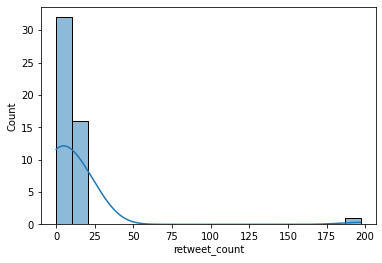

In [56]:
sns.histplot(tweet_df['retweet_count'],kde=True)

In [48]:
tweet_df['source'].unique()

array(['Twitter Web App', 'Twitter for Android', 'Twitter for iPad',
       'AdvisorStream v2', 'SocialFlow', 'Twitter for iPhone',
       'WordPress.com', 'ThingTweet', 'node-once-tweet',
       'Motivational App', 'TweetDeck', 'dlvr.it', 'ContentStudio.io',
       'Blog2Social APP', 'ZAQS Tech'], dtype=object)

In [64]:
tweet_df['source'].value_counts()


Twitter for iPhone     13
Twitter Web App        12
Twitter for Android     6
TweetDeck               4
SocialFlow              2
AdvisorStream v2        2
dlvr.it                 2
WordPress.com           1
Blog2Social APP         1
ContentStudio.io        1
Motivational App        1
ZAQS Tech               1
ThingTweet              1
Twitter for iPad        1
node-once-tweet         1
Name: source, dtype: int64

In [60]:
source_df= tweet_df['source'].value_counts().rename_axis('unique_sources').to_frame('counts')
source_df.head(10)

,counts
unique_sources,
Twitter for iPhone,13
Twitter Web App,12
Twitter for Android,6
TweetDeck,4
SocialFlow,2
AdvisorStream v2,2
dlvr.it,2
WordPress.com,1
Blog2Social APP,1


In [74]:
source_dict = source_df.to_dict(orient='dict')
source_dict


{'counts': {'AdvisorStream v2': 2,
  'Blog2Social APP': 1,
  'ContentStudio.io': 1,
  'Motivational App': 1,
  'SocialFlow': 2,
  'ThingTweet': 1,
  'TweetDeck': 4,
  'Twitter Web App': 12,
  'Twitter for Android': 6,
  'Twitter for iPad': 1,
  'Twitter for iPhone': 13,
  'WordPress.com': 1,
  'ZAQS Tech': 1,
  'dlvr.it': 2,
  'node-once-tweet': 1}}

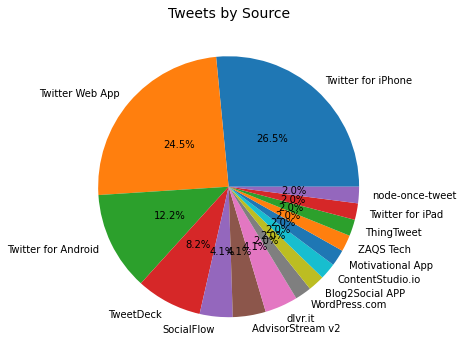

In [79]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = list(source_dict['counts'].keys())
labels
plt.pie(x=source_dict['counts'].values(), autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Tweets by Source", fontsize=14);